In [1]:
import pandas as pd # csv file
from sklearn.linear_model import LinearRegression # 선형 회귀 모델 생성
from sklearn.model_selection import train_test_split # train/test set 생성
from sklearn.metrics import mean_squared_error # MSE : 평균제곱오차 - model 평가

In [2]:
# 1. data set loading
half = pd.read_csv("C:/Users/jjh99/바탕 화면/capstone_data/real_data_no_log.csv", encoding = 'CP949')
# half.info()

# half는 상권 코드 (첫 번째 열)까지 포함한 data set. 이를 제거한 use로 해야 됨. 
use = half.iloc[:, 1:]
use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1301 entries, 0 to 1300
Data columns (total 79 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   총_매출_금액                 1301 non-null   float64
 1   아파트_단지_수                1301 non-null   float64
 2   아파트_면적_66_제곱미터_미만_세대_수  1301 non-null   float64
 3   아파트_면적_66_제곱미터_세대_수     1301 non-null   float64
 4   아파트_면적_99_제곱미터_세대_수     1301 non-null   float64
 5   아파트_면적_132_제곱미터_세대_수    1301 non-null   float64
 6   아파트_면적_165_제곱미터_세대_수    1301 non-null   float64
 7   아파트_가격_1_억_미만_세대_수      1301 non-null   float64
 8   아파트_가격_1_억_세대_수         1301 non-null   float64
 9   아파트_가격_2_억_세대_수         1301 non-null   float64
 10  아파트_가격_3_억_세대_수         1301 non-null   float64
 11  아파트_가격_4_억_세대_수         1301 non-null   float64
 12  아파트_가격_5_억_세대_수         1301 non-null   float64
 13  아파트_가격_6_억_이상_세대_수      1301 non-null   float64
 14  아파트_평균_면적               1301 non-null   

In [3]:
cols = list(use.columns)
cols

['총_매출_금액',
 '아파트_단지_수',
 '아파트_면적_66_제곱미터_미만_세대_수',
 '아파트_면적_66_제곱미터_세대_수',
 '아파트_면적_99_제곱미터_세대_수',
 '아파트_면적_132_제곱미터_세대_수',
 '아파트_면적_165_제곱미터_세대_수',
 '아파트_가격_1_억_미만_세대_수',
 '아파트_가격_1_억_세대_수',
 '아파트_가격_2_억_세대_수',
 '아파트_가격_3_억_세대_수',
 '아파트_가격_4_억_세대_수',
 '아파트_가격_5_억_세대_수',
 '아파트_가격_6_억_이상_세대_수',
 '아파트_평균_면적',
 '아파트_평균_시가',
 '총_유동인구_수',
 '남성_유동인구_수',
 '여성_유동인구_수',
 '연령대_10_유동인구_수',
 '연령대_20_유동인구_수',
 '연령대_30_유동인구_수',
 '연령대_40_유동인구_수',
 '연령대_50_유동인구_수',
 '연령대_60_이상_유동인구_수',
 '시간대_1_유동인구_수',
 '시간대_2_유동인구_수',
 '시간대_3_유동인구_수',
 '시간대_4_유동인구_수',
 '시간대_5_유동인구_수',
 '시간대_6_유동인구_수',
 '월요일_유동인구_수',
 '화요일_유동인구_수',
 '수요일_유동인구_수',
 '목요일_유동인구_수',
 '금요일_유동인구_수',
 '토요일_유동인구_수',
 '일요일_유동인구_수',
 '총.상주인구.수',
 '남성.상주인구.수',
 '여성.상주인구.수',
 '연령대.10.상주인구.수',
 '연령대.20.상주인구.수',
 '연령대.30.상주인구.수',
 '연령대.40.상주인구.수',
 '연령대.50.상주인구.수',
 '연령대.60.이상.상주인구.수',
 '총.가구.수',
 '아파트.가구.수',
 '비.아파트.가구.수',
 '총_직장_인구_수',
 '남성_직장_인구_수',
 '여성_직장_인구_수',
 '연령대_10_직장_인구_수',
 '연령대_20_직장_인구_수',
 '연령대_30_직장_인구_수',
 '연령대_40_직장_인구_수',
 '연령대_

In [4]:
x_cols = cols[1:]
y_cols = cols[0]
x_cols # 78개의 column
y_cols # 총_매출_금액

'총_매출_금액'

In [5]:
# train set과 test set split(7:3)
use_train, use_test = train_test_split(use, test_size = 0.3)

In [6]:
use_train.shape # (910, 79)
use_test.shape # (391, 79)

(391, 79)

In [7]:
model = LinearRegression() # 생성자 -> 객체 생성
model.fit(X = use_train[x_cols], y = use_train[y_cols]) 

LinearRegression()

In [8]:
model.coef_ # 기울기

array([ 3.08162445e+16,  4.33236702e+16,  4.48046107e+16,  3.22249817e+16,
        7.76474574e+16,  1.98932637e+16, -4.91095658e+16, -4.78869927e+16,
       -4.36113857e+16, -3.72631302e+16, -4.94529450e+16, -6.00458416e+16,
       -1.98672673e+16, -1.48481701e+14, -4.65800624e+08,  9.29327703e+15,
        4.04020475e+15,  4.12141998e+15, -6.39301983e+15, -6.63647428e+15,
       -6.19657321e+15, -6.99128753e+15, -6.35669106e+15, -6.68733836e+15,
       -5.11464961e+15, -5.59509902e+15, -5.20411617e+15, -5.06809896e+15,
       -5.37539489e+15, -5.11037474e+15, -2.52944752e+15, -1.08318654e+15,
       -1.27365204e+15, -1.13861140e+15, -1.91971599e+15, -1.52480163e+15,
       -1.42395619e+15,  1.30823320e+16,  3.07547722e+17,  3.16734092e+17,
       -3.57357814e+17, -3.14048944e+17, -3.29028510e+17, -2.87602424e+17,
       -3.18514969e+17, -3.37169441e+17, -1.09542579e+17,  1.09889225e+17,
        1.05652941e+17,  1.07846257e+17, -2.94674287e+17, -2.91843287e+17,
        1.29208532e+17,  

In [9]:
model.intercept_ # 절편 384001460.6466751
# 회귀방정식 = X * 기울기 + 절편
# 실행할 때마다 값이 바뀌므로 이 값 자체는 유의미하지는 않음

384001460.6466751

In [10]:
# 모델 평가 : test
# 1) 모델 예측
y_pred = model.predict(X=use_test[x_cols])
y_pred
len(y_pred) # 391

391

In [11]:
y_true = use_test[y_cols]
y_true

1094    5.845542e+10
373     1.596205e+10
427     4.070190e+09
300     2.019146e+09
1025    2.729859e+10
            ...     
245     9.876637e+09
336     5.682333e+08
89      2.487939e+09
156     1.445828e+10
148     1.426548e+09
Name: 총_매출_금액, Length: 391, dtype: float64

In [12]:
# 실제값(y_true)과 예측값(y_pred) 리스트 출력
sample = pd.DataFrame(
{
    'y_pred' : y_pred,
    'y_true' : y_true
})
sample

,y_pred,y_true
1094,4.330186e+09,5.845542e+10
373,1.221719e+10,1.596205e+10
427,6.522292e+09,4.070190e+09
300,4.428996e+09,2.019146e+09
1025,2.696875e+10,2.729859e+10
...,...,...
245,1.300837e+10,9.876637e+09
336,-3.542153e+08,5.682333e+08
89,8.064224e+09,2.487939e+09
156,2.540638e+10,1.445828e+10


In [13]:
# 2) 정답
Y = use_test[y_cols]
Y
len(Y) # 391

391

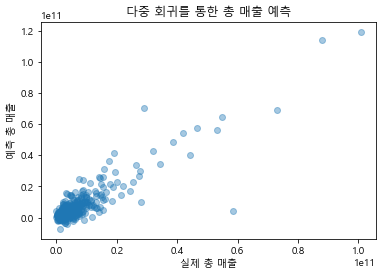

In [14]:
# 시각화를 통한 확인. 직선 부근에 데이터가 모여있을수록 
#다중 회귀 분석이 잘 되었다고 할 수 있다.
import matplotlib.pyplot as plt

# 글꼴 설정 통해 Glyph 49892 missing from current font. 오류 해결
plt.rc('font', family = 'Malgun Gothic') # 맑은 고딕
plt.scatter(use_test[y_cols], y_pred, alpha = 0.4)
plt.xlabel("실제 총 매출")
plt.ylabel("예측 총 매출")
plt.title("다중 회귀를 통한 총 매출 예측")
plt.show()

In [15]:
print("train set score: {}".format(model.score(use_train[x_cols], use_train[y_cols])))
print("test set score: {}".format(model.score(use_test[x_cols], use_test[y_cols])))

train set score: 0.9059856606025053
test set score: 0.694154206656521


In [16]:
# 3) RMSE (평균제곱근오차) 평가
rmse = mean_squared_error(y_true = Y, y_pred = y_pred) ** 0.5
print('rmse = ', rmse)
# rmse = 5873435115.634151
# 이 값이 작을수록 모델의 예측력이 높음
# 종속 변수인 '총 매출'의 데이터 자체가 원래 큰 값임을 고려할 것!

rmse =  5873435115.634151


In [17]:
# 4) 상관 계수
type(y_pred) # numpy.ndarray -> Series로 바꾸기
type(Y) # pandas.core.series.Series

pandas.core.series.Series

In [18]:
y_pred = pd.Series(y_pred)
type(y_pred) # pandas.core.series.Series
# 이제 y_pred와 Y는 같은 Series 객체로 호환성을 갖췄기 때문에 상관 분석 가능

pandas.core.series.Series

In [19]:
# 예측치와 관측치 이용해서 DF 생성
df = pd.DataFrame({'pred' : y_pred, 'Y' : Y})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 656 entries, 0 to 1297
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pred    391 non-null    float64
 1   Y       391 non-null    float64
dtypes: float64(2)
memory usage: 15.4 KB


In [20]:
cor = df['pred'].corr(df['Y'])
cor # 이 값의 절댓값이 클수록 모델의 예측력이 높은 것
# 0.02404548906383753

0.02404548906383753

In [21]:
# 상대 오차 구하기 
# 실제값과 예측값의 차를 실제값으로 나눠 오차의 정도를 파악할 수 있음
relative_error = (sample['y_true'] - sample['y_pred']) / sample['y_true']
relative_error.head()
sample['relative_error'] = relative_error
sample.head()

,y_pred,y_true,relative_error
1094,4.330186e+09,5.845542e+10,0.925923
373,1.221719e+10,1.596205e+10,0.234610
427,6.522292e+09,4.070190e+09,-0.602454
300,4.428996e+09,2.019146e+09,-1.193500
1025,2.696875e+10,2.729859e+10,0.012082


In [22]:
# 예측값과 실제값, 상대 오차로 이루어진 list csv 파일 생성
sample.to_csv("C:\\Users\\jjh99\\바탕 화면\\capstone_data\\relative_error_no_log.csv", encoding = 'utf-8-sig')